/Users/Collin/PycharmProjects/ML_Tutorial_Bilibili/Bilibili_Machine_Learning/第9课资料/lesson9/plot_utils.py:24: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


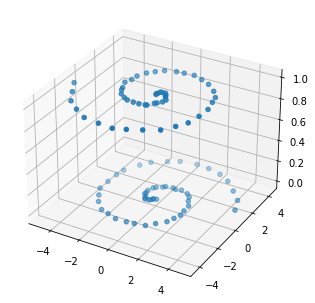

In [1]:
import numpy as np
import dataset
import plot_utils

# Generate the dataset
SAMPLE_SIZE = 100
X,Y = dataset.get_beans(SAMPLE_SIZE)
plot_utils.show_scatter(X, Y)

## Using a 2 neuro node, 2D input and sigmoid as activation function

<img src="2D_inputs_2_neuro_nodes.png" alt="A simple neural network" width="400"/>

This will give a not very good fitting result

2021-10-20 17:06:42.061626: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-20 17:06:42.062110: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.2738 - accuracy: 0.5000
Epoch 2/1000
100/100 [==============================] - 0s 123us/step - loss: 0.2735 - accuracy: 0.5000
Epoch 3/1000
100/100 [==============================] - 0s 118us/step - loss: 0.2733 - accuracy: 0.5000
Epoch 4/1000
100/100 [==============================] - 0s 137us/step - loss: 0.2730 - accuracy: 0.5000
Epoch 5/1000
100/100 [==============================] - 0s 166us/step - loss: 0.2727 - accuracy: 0.5000
Epoch 6/1000
100/100 [==============================] - 0s 160us/step - loss: 0.2725 - accuracy: 0.5000
Epoch 7/1000
100/100 [==============================] - 0s 165us/step - loss: 0.2722 - accuracy: 0.5000
Epoch 8/1000
100/100 [==============================] - 0s 166us/step - loss: 0.2720 - accuracy: 0.5000
Epoch 9/1000
100/100 [==============================] - 0s 119us/step - loss: 0.2717 - accuracy: 0.4700
Epoch 10/1000
100/100 [==============================] - 0s 198us/

/Users/Collin/PycharmProjects/ML_Tutorial_Bilibili/Bilibili_Machine_Learning/第9课资料/lesson9/plot_utils.py:82: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


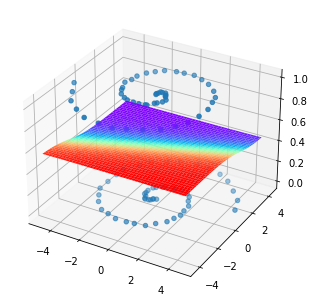

In [2]:
# Import keras
from keras.models import Sequential
from keras.layers import Dense

# Create a model
model = Sequential()

# Add 2 neuro node to hidden layer, employ sigmoid activation function, input dimension is 2
model.add(Dense(units=2, activation='sigmoid', input_dim=2))
model.add(Dense(units=1, activation='sigmoid'))

# Choose to use mean square error cost function and Stochastic gradient descent algorithm
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

# Start training
model.fit(X, Y, epochs=1000, batch_size=20)        # epochs: # of rounds of training, batch size: how many data point in each single training
# number of total training = (sample_size / batch_size) * epochs

predict = model.predict(X)

plot_utils.show_scatter_surface(X, Y, model)

Print the function parameters in the trained model

<img src="Keras_model_output.png" alt="A simple neural network" width="500"/>

The first ${2*2}$ matrix is the $W_1^T$, second $1*2$ array is $B_1$

and the 3rd matrix is the $W_2^T$

In [3]:
print(model.get_weights())

[array([[ 0.4114794 ,  0.03923756],
       [-1.128702  , -0.79186887]], dtype=float32), array([-0.01605291, -0.00640419], dtype=float32), array([[0.518942 ],
       [0.0228478]], dtype=float32), array([-0.21053456], dtype=float32)]


## Change activation function to get better fitting result

Epoch 1/2000
100/100 [==============================] - 1s 5ms/step - loss: 0.2756 - accuracy: 0.5100
Epoch 2/2000
100/100 [==============================] - 0s 196us/step - loss: 0.2672 - accuracy: 0.5000
Epoch 3/2000
100/100 [==============================] - 0s 207us/step - loss: 0.2612 - accuracy: 0.4800
Epoch 4/2000
100/100 [==============================] - 0s 252us/step - loss: 0.2573 - accuracy: 0.4800
Epoch 5/2000
100/100 [==============================] - 0s 258us/step - loss: 0.2544 - accuracy: 0.5000
Epoch 6/2000
100/100 [==============================] - 0s 284us/step - loss: 0.2524 - accuracy: 0.5400
Epoch 7/2000
100/100 [==============================] - 0s 291us/step - loss: 0.2508 - accuracy: 0.5600
Epoch 8/2000
100/100 [==============================] - 0s 833us/step - loss: 0.2493 - accuracy: 0.5700
Epoch 9/2000
100/100 [==============================] - 0s 237us/step - loss: 0.2481 - accuracy: 0.5500
Epoch 10/2000
100/100 [==============================] - 0s 217us/

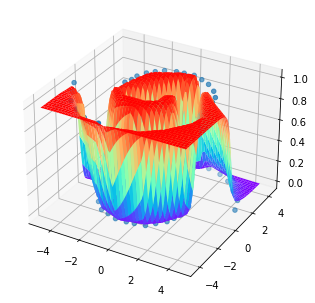

In [4]:
# Import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

# Create a model
model_2 = Sequential()

# 3 hidden layers, each layer has 8 nodes
# Add 8 neuro node to hidden layer, employ sigmoid activation function, input dimension is 2
model_2.add(Dense(units=8, activation='relu', input_dim=2))
model_2.add(Dense(units=8, activation='relu'))
model_2.add(Dense(units=8, activation='relu'))
model_2.add(Dense(units=1, activation='sigmoid'))

# Choose to use mean square error cost function and Stochastic gradient descent algorithm
model_2.compile(loss='mean_squared_error', optimizer=SGD(lr=0.05), metrics=['accuracy'])

# Start training
model_2.fit(X, Y, epochs=2000, batch_size=10)        # epochs: # of rounds of training, batch size: how many data point in each single training
# number of total training = (sample_size / batch_size) * epochs

predict = model_2.predict(X)

plot_utils.show_scatter_surface(X, Y, model_2)